In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

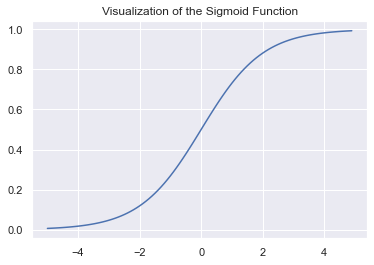

In [34]:
def sigmoid(z):
	return 1 / (1 + np.exp( - z))

plt.plot(np.arange(-5, 5, 0.1), sigmoid(np.arange(-5, 5, 0.1)))
plt.title('Visualization of the Sigmoid Function')

plt.show()

In [35]:
df = pd.read_csv('dataset.csv')
df.head()

,0,5.1,3.5,1
0,1,4.9,3.0,1
1,2,4.7,3.2,1
2,3,4.6,3.1,1
3,4,5.0,3.6,1
4,5,5.4,3.9,1


In [36]:
x_orig = df.iloc[:, 1:-1].values
y_orig = df.iloc[:, -1:].values

print("Shape of Feature Matrix:", x_orig.shape)
print("Shape Label Vector:", y_orig.shape)

Shape of Feature Matrix: (99, 2)
Shape Label Vector: (99, 1)


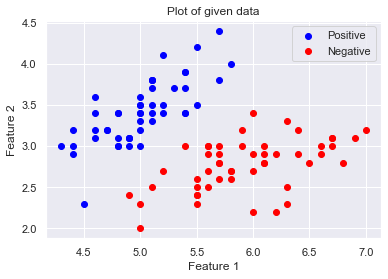

In [37]:
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
                                    if y_orig[i] == 1])

x_neg = np.array([x_orig[i] for i in range(len(x_orig))
                                    if y_orig[i] == 0])

plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive')

plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()

plt.show()

In [38]:
oneHot = OneHotEncoder()

oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

alpha, epochs = 0.0035, 500
m, n = x.shape
print('m =', m)
print('n =', n)
print('Learning Rate =', alpha)
print('Number of Epochs =', epochs)

m = 99
n = 51
Learning Rate = 0.0035
Number of Epochs = 500


In [39]:
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32, [None, 2])

W = tf.Variable(tf.zeros([n, 2]))
b = tf.Variable(tf.zeros([2]))

In [40]:
# Hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(
					logits = Y_hat, labels = Y)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(
		learning_rate = alpha).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()

In [43]:
# Starting the Tensorflow Session
with tf.Session() as sess:

	# Initializing the Variables
	sess.run(init)

	# Lists for storing the changing Cost and Accuracy in every Epoch
	cost_history, accuracy_history = [], []

	# Iterating through all the epochs
	for epoch in range(epochs):
		cost_per_epoch = 0

		# Running the Optimizer
		sess.run(optimizer, feed_dict = {X : x, Y : y})

		# Calculating cost on current Epoch
		c = sess.run(cost, feed_dict = {X : x, Y : y})

		# Calculating accuracy on current Epoch
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
										tf.argmax(Y, 1))
		accuracy = tf.reduce_mean(tf.cast(correct_prediction,
												tf.float32))

		# Storing Cost and Accuracy to the history
		cost_history.append(sum(sum(c)))
		accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)

		# Displaying result on current Epoch
		if epoch % 100 == 0 and epoch != 0:
			print("Epoch " + str(epoch) + " Cost: "
							+ str(cost_history[-1]))

	Weight = sess.run(W) # Optimized Weight
	Bias = sess.run(b) # Optimized Bias

	# Final Accuracy
	correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
									tf.argmax(Y, 1))
	accuracy = tf.reduce_mean(tf.cast(correct_prediction,
											tf.float32))
	print("\nAccuracy:", accuracy_history[-1], "%")

Epoch 100 Cost: 135.09849548339844
Epoch 200 Cost: 131.55274200439453
Epoch 300 Cost: 128.7213363647461
Epoch 400 Cost: 126.28994750976562

Accuracy: 88.88888955116272 %


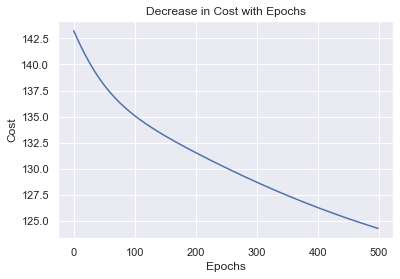

In [44]:
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')

plt.show()

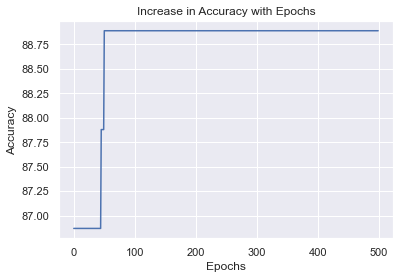

In [46]:
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')

plt.show()

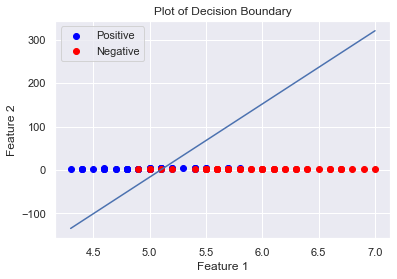

In [48]:
# Calculating the Decision Boundary
decision_boundary_x = np.array([np.min(x_orig[:, 0]),
							np.max(x_orig[:, 0])])

decision_boundary_y = (- 1.0 / Weight[0]) * (decision_boundary_x * Weight + Bias)

decision_boundary_y = [sum(decision_boundary_y[:, 0]),
					sum(decision_boundary_y[:, 1])]

# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 0])

# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1],
color = 'blue', label = 'Positive')

# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1],
color = 'red', label = 'Negative')

# Plotting the Decision Boundary
plt.plot(decision_boundary_x, decision_boundary_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of Decision Boundary')
plt.legend()

plt.show()